+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/opt/homebrew/anaconda3/envs/openmm/lib/libplumedKernel.dylib" +++
/var/folders/hn/t1s7dmhn2j7ct2zj0hs8zgsr0000gn/T/ipykernel_56290/775088249.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = plumed.read_as_pandas('../../data/241010_FoldingUponBinding/output/241029/A-synuclein/general_5/A-synuclein_general_colvar_with_walls.colvar')


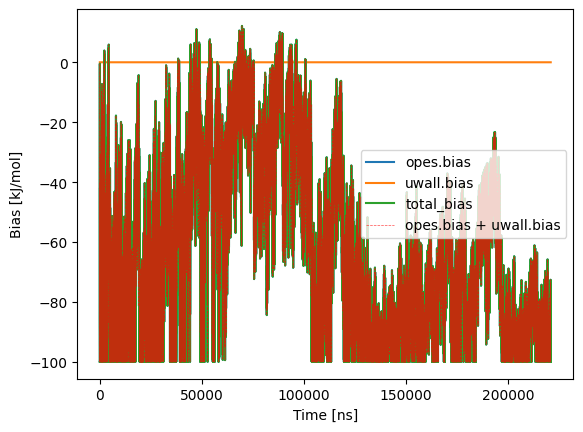

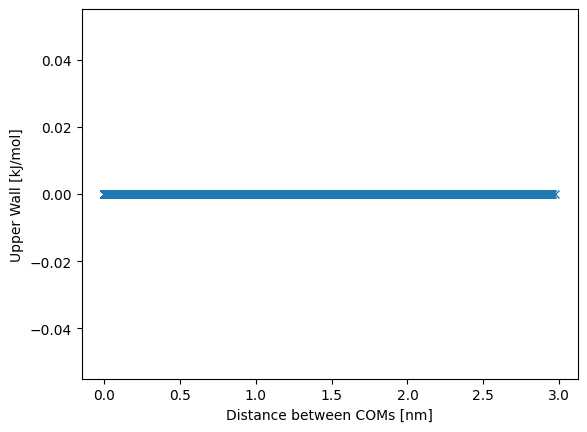

In [18]:
import plumed

df = plumed.read_as_pandas('../../data/241010_FoldingUponBinding/output/241029/A-synuclein/general_5/A-synuclein_general_colvar_with_walls.colvar')

import matplotlib.pyplot as plt

plt.plot(df['opes.bias'])
plt.plot(df['uwall.bias'])
plt.plot(df['total_bias'])
plt.plot(df['opes.bias'] + df['uwall.bias'], '--', linewidth=0.5, alpha=0.7, color='red')
plt.legend(['opes.bias', 'uwall.bias', 'total_bias', 'opes.bias + uwall.bias'])
plt.ylabel('Bias [kJ/mol]')
plt.xlabel('Time [ns]')
plt.show()

plt.plot(df['d'], df['uwall.bias'], 'x')
plt.xlabel('Distance between COMs [nm]')
plt.ylabel('Upper Wall [kJ/mol]')
plt.show()


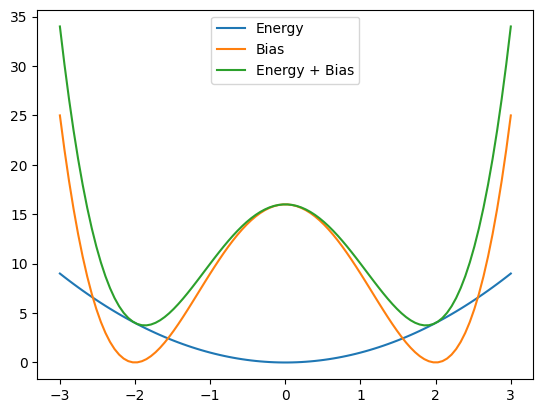

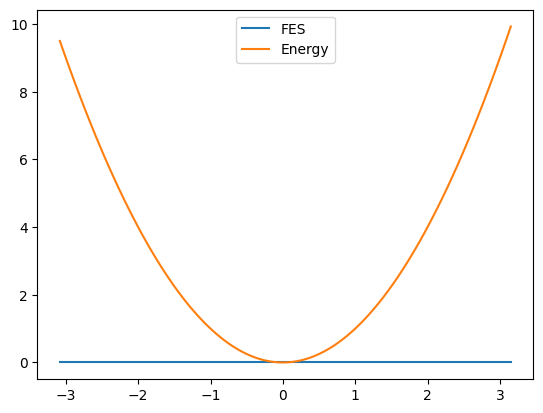

In [10]:
import sys
sys.path.append('../../')
from src.analysis.fes import compute_fes
from src.constants import kB
import matplotlib.pyplot as plt

import pandas as pd
def energy_fn(x):
    return x**2
def gradient_fn(x):
    return 2*x

def bias_fn(x):
    return 1.0 * (x**2 - 2.0**2)**2
def bias_gradient_fn(x):
    return 4.0 * (x**2 - 2.0**2) * x

def biased_sim_gradient_fn(x):
    return gradient_fn(x) + bias_gradient_fn(x)

import numpy as np
x = np.linspace(-3, 3, 100)

plt.plot(x, energy_fn(x), label='Energy')
plt.plot(x, bias_fn(x), label='Bias')
plt.plot(x, energy_fn(x) + bias_fn(x), label='Energy + Bias')
plt.legend()
plt.show()

kbT = 5.0
from tests.test_fes import simple_nvt
x, traj_x = simple_nvt(x0=0.0, dt=0.001, n_steps=1e7, gradient_fn=biased_sim_gradient_fn, gamma=1.0, kT=kbT)
colvar_df = pd.DataFrame({'x': traj_x})
x_bins, y_bins, fes = compute_fes(colvar_df, sigma=0.1, temp=kbT*kB, cvs=['x'], outfile='fes.h5py', bias=None)

plt.plot(x_bins, fes, label='FES')
plt.plot(x_bins, energy_fn(x_bins), label='Energy')
plt.legend()
plt.show()

In [16]:
from src.analysis.fes import compute_kde_weights
from scipy.stats import gaussian_kde
colvar_df = pd.DataFrame({'x': traj_x})
weights = compute_kde_weights(colvar_df, bias=None, kbT=kbT*kB)
kde = gaussian_kde(colvar_df['x'].values, weights=weights)
plt.plot(colvar_df['x'], kde(colvar_df['x']), label='KDE')
plt.legend()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Read kernels data
kernels = pd.read_csv('../../data/241010_FoldingUponBinding/output/241029/A-synuclein/alpha_1/A-synuclein_alpha.kernels', 
                      delim_whitespace=True,
                      names=['time', 'cmap', 'd', 'sigma_cmap', 'sigma_d', 'height', 'logweight'],
                      skiprows=6)

from sklearn.neighbors import KernelDensity

# Prepare data
data = kernels[['cmap', 'd']].values

# Define grid
cmap_grid = np.linspace(kernels.cmap.min(), kernels.cmap.max(), 100)
d_grid = np.linspace(kernels.d.min(), kernels.d.max(), 100)
X, Y = np.meshgrid(cmap_grid, d_grid)
grid_coords = np.vstack([X.ravel(), Y.ravel()]).T

# Fit KDE
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')  # Adjust bandwidth as needed
kde.fit(data)

# Evaluate KDE on grid
log_density = kde.score_samples(grid_coords)
Z = np.exp(log_density).reshape(X.shape)

# Plot the KDE
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z, levels=20)
plt.colorbar(label='Density')
plt.xlabel('CMAP')
plt.ylabel('d')
plt.title('Kernel Density Estimation')
plt.show()

/var/folders/hn/t1s7dmhn2j7ct2zj0hs8zgsr0000gn/T/ipykernel_73396/2519280810.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  kernels = pd.read_csv('../../data/241010_FoldingUponBinding/output/241029/A-synuclein/alpha_1/A-synuclein_alpha.kernels',


In [1]:
megavar = -1
def fun():
    global megavar
    var = 42
    try:
        return var
    except Exception:
        print( 'oops')
    finally:
        var = 3.14
    megavar = 1

print (fun(), megavar)

42 -1


In [12]:
# get 1/2 kBT from OpenMM
from openmm import unit
temperature = 300 * unit.kelvin
kB = unit.BOLTZMANN_CONSTANT_kB
half_kT = 0.5 * kB * temperature
print("1/2 kBT [kJ/mol]:", (half_kT * unit.AVOGADRO_CONSTANT_NA).value_in_unit(unit.kilojoule_per_mole))

1/2 kBT [kJ/mol]: 1.247169392722986
